In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import pandas as pd
import graphviz 
from sklearn import tree

In [30]:
nps = pd.read_csv("nps_df.csv")

In [31]:
#Vamos ter uma visão geral do dataset
nps.describe()

,age,salary,num_reclama_sac,target
count,20000.000000,20000.000000,20000.00000,20000.000000
mean,37.522147,5004.402664,2.73460,0.500000
std,16.525137,494.546667,2.73736,0.500013
min,-3.229341,3053.513022,0.00000,0.000000
25%,24.622656,4670.544578,1.00000,0.000000
50%,29.211314,5004.809172,2.00000,0.500000
75%,50.092705,5339.915932,4.00000,1.000000
max,109.422938,6960.538328,9.00000,1.000000


In [32]:
nps.isnull().sum() #Sem nulos

age                0
salary             0
num_reclama_sac    0
target             0
dtype: int64

In [33]:
nps.groupby("target").agg(["mean","median"])

age                  salary              num_reclama_sac       
             mean     median         mean       median            mean median
target                                                                       
0       50.081755  50.092814  5002.170139  5002.602383          0.9858      1
1       24.962540  24.974145  5006.635190  5006.699538          4.4834      4

In [34]:
#Vamos preparar para o processo de modelagem
X_train, X_test, y_train, y_test = train_test_split(nps.drop(["target"], axis = 1),
                                                    nps.target,
                                                    test_size = 0.3
                                                   )

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
train_performance = dt.predict(X_train)
test_performance = dt.predict(X_test)
print(classification_report(y_train, train_performance)) 
print(classification_report(y_test, test_performance)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6935
           1       1.00      1.00      1.00      7065

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3065
           1       0.93      0.93      0.93      2935

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



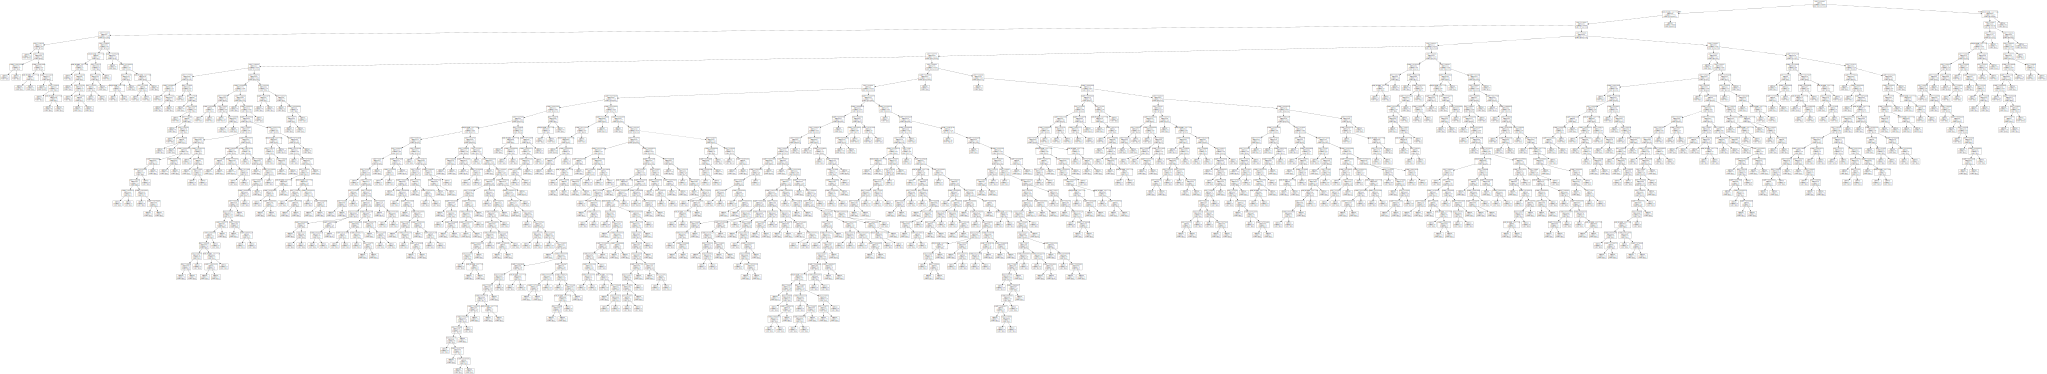

In [36]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=nps.drop(["target"],axis=1).columns) 
graph = graphviz.Source(dot_data)
graph

In [40]:
dt = DecisionTreeClassifier(max_depth = 3) #Poda da árvore para amenizar efeito de overfitting
dt.fit(X_train,y_train)
train_performance = dt.predict(X_train)
test_performance = dt.predict(X_test)
print(classification_report(y_train, train_performance)) 
print(classification_report(y_test, test_performance)) 

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      6935
           1       0.91      1.00      0.95      7065

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3065
           1       0.91      1.00      0.95      2935

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.96      0.95      0.95      6000



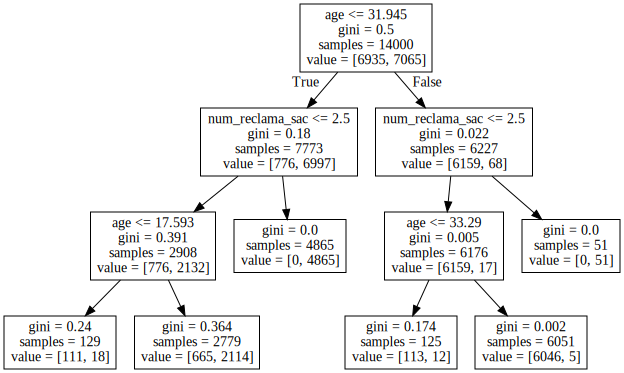

In [39]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=nps.drop(["target"],axis=1).columns) 
graph = graphviz.Source(dot_data)
graph